# Test the flow of image corrections implemented in the NeaImager module

## Import modules needed

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os, sys
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
import NeaImager as neaim

## Read a measurement and info file

Amplitude? True, Phase? False, Topography? False


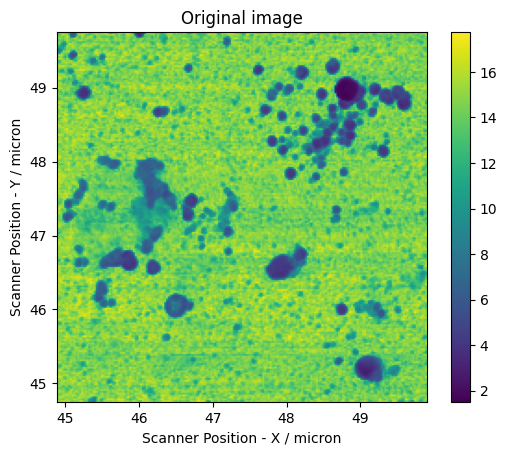

In [9]:
# File path
current_folder = os.getcwd()
meas_path = os.path.join(current_folder,'testPsHetImage.gwy')
info_path = os.path.join(current_folder,'testinfofile.txt')

# Create NeaImage object and load data
channelname = 'O3A raw'
m = neaim.NeaImage()
m.read_from_gwyfile(meas_path,channelname)
m.parameters = m.read_info_file(info_path)

# Print the attributes of neaimage object
# print(f'Attributes: {vars(m)}')
# print(f'Parameters dict keys: {list(m.parameters.keys())}')

# Check measurement type
print(f'Amplitude? {m.isamp}, Phase? {m.isphase}, Topography? {m.istopo}')

# Plot the original image
xmin = (-m.xreal/2+m.xoff)*1e6
xmax = (m.xreal/2+m.xoff)*1e6
ymin = (-m.yreal/2+m.yoff)*1e6
ymax = (m.yreal/2+m.yoff)*1e6

plt.imshow(m.data, extent=[xmin, xmax, ymin, ymax])
plt.xlabel('Scanner Position - X / micron')
plt.ylabel('Scanner Position - Y / micron')
plt.title('Original image')
plt.colorbar()
plt.show()

## Line leveling

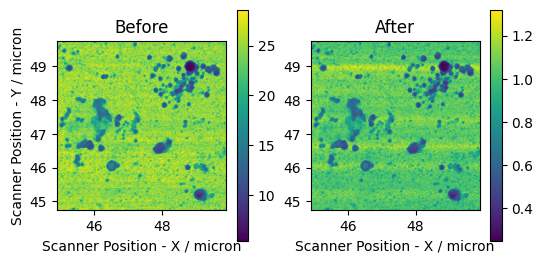

Amplitude? True, Phase? False, Topography? False


In [3]:
mtype = 'average' # 'difference' or 'median'
m_levelled = neaim.LineLevel(inputobj = m, mtype = mtype)

# Plot before-after
px = 1/plt.rcParams['figure.dpi']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(600*px, 300*px))
# Before image
im1 = ax1.imshow(m.data,extent=[xmin, xmax, ymin, ymax])
ax1.set(xlabel='Scanner Position - X / micron',ylabel='Scanner Position - Y / micron')
ax1.set_title('Before')
fig.colorbar(im1,ax=ax1)
# After image
im2 = ax2.imshow(m_levelled.data,extent=[xmin, xmax, ymin, ymax])
ax2.set(xlabel='Scanner Position - X / micron')
ax2.set_title('After')
fig.colorbar(im2,ax=ax2)
plt.show()

print(f'Amplitude? {m.isamp}, Phase? {m.isphase}, Topography? {m.istopo}')

## Polynomial background fitting

1. Usecase: Remove plane or more complex backgrounds by 2d fitting
2. Function: Fits and removes a 2d polynomial background
    - polynomial orders are defined by `xorder` and `yorder` arguments
    - returns both backgroung and the corrected image

divide
True


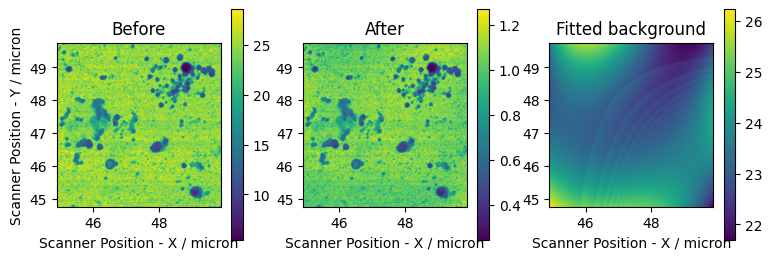

Amplitude? True, Phase? False, Topography? False


In [4]:
xdegree = 3
ydegree = 2

m_bg, fitted_bg = neaim.BackgroundPolyFit(inputobj = m, xorder=xdegree, yorder=ydegree)

# Plot before-after
px = 1/plt.rcParams['figure.dpi']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(900*px, 300*px))
# Before image
im1 = ax1.imshow(m.data,extent=[xmin, xmax, ymin, ymax])
ax1.set(xlabel='Scanner Position - X / micron',ylabel='Scanner Position - Y / micron')
ax1.set_title('Before')
fig.colorbar(im1,ax=ax1)
# After image
im2 = ax2.imshow(m_bg.data,extent=[xmin, xmax, ymin, ymax])
ax2.set(xlabel='Scanner Position - X / micron')
ax2.set_title('After')
fig.colorbar(im2,ax=ax2)
# Fitted background
im3 = ax3.imshow(fitted_bg,extent=[xmin, xmax, ymin, ymax])
ax3.set(xlabel='Scanner Position - X / micron')
ax3.set_title('Fitted background')
fig.colorbar(im3,ax=ax3)
plt.show()

print(f'Amplitude? {m_bg.isamp}, Phase? {m_bg.isphase}, Topography? {m_bg.istopo}')

## Phase rotation

1. Usecase: when you see large jump in the phase images between -pi:pi
2. Function: 
    - loads the amplitude image of the same order
    - creates the complex values image
    - rotates the all complex pixel values with a phase given by the `degree` argument
    - calculates the new phase values

Amplitude? True, Phase? False, Topography? False


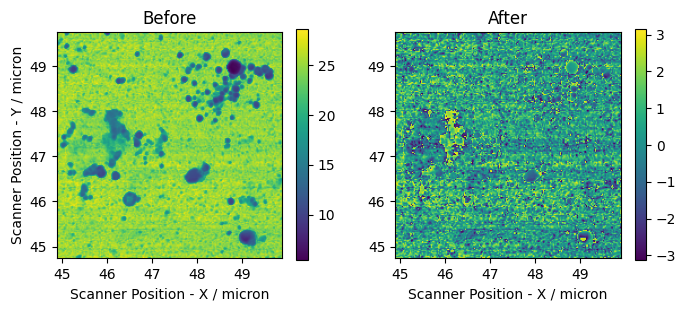

In [5]:
deg = 45
m_rot = neaim.RotatePhase(inputobj = m, degree = deg)

# Plot before-after
px = 1/plt.rcParams['figure.dpi']
imheight = 300*px
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*imheight + 200*px, imheight))
# Before image
im1 = ax1.imshow(m.data,extent=[xmin, xmax, ymin, ymax])
ax1.set(xlabel='Scanner Position - X / micron',ylabel='Scanner Position - Y / micron')
ax1.set_title('Before')
fig.colorbar(im1,ax=ax1)
# After image
im2 = ax2.imshow(m_rot.data,extent=[xmin, xmax, ymin, ymax])
ax2.set(xlabel='Scanner Position - X / micron')
ax2.set_title('After')
fig.colorbar(im2,ax=ax2)

print(f'Amplitude? {m_rot.isamp}, Phase? {m_rot.isphase}, Topography? {m_rot.istopo}')

## Self Referencing
1. Usecase: correct complex artifacts coming from remaining the background scattering not related to near-field interaction
    - Method is based on: L. Mester et al. Nanophotonics 2022; 11(2): 377–390
2. Function: 
    - Loads the given nth order image 
    - Normalizes all the pixel values using the pixels of the loaded image

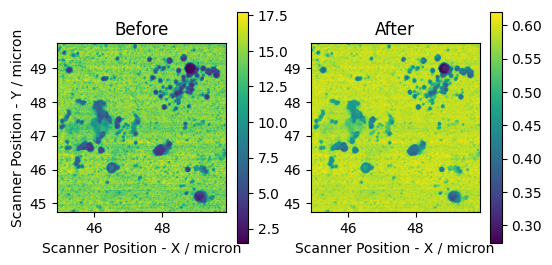

Amplitude? True, Phase? False, Topography? False


In [13]:
# Define order and call the method
order = 2
m_ref = neaim.SelfReferencing(inputobj = m, order = order)

# Plot before-after
px = 1/plt.rcParams['figure.dpi']
imheight = 300*px
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*imheight, imheight))
# Before image
im1 = ax1.imshow(m.data,extent=[xmin, xmax, ymin, ymax])
ax1.set(xlabel='Scanner Position - X / micron',ylabel='Scanner Position - Y / micron')
ax1.set_title('Before')
fig.colorbar(im1,ax=ax1)
# After image
im2 = ax2.imshow(m_ref.data,extent=[xmin, xmax, ymin, ymax])
ax2.set(xlabel='Scanner Position - X / micron')
ax2.set_title('After')
fig.colorbar(im2,ax=ax2)
plt.show()

print(f'Amplitude? {m_ref.isamp}, Phase? {m_ref.isphase}, Topography? {m_ref.istopo}')

## Simple normalization

1. Usecase: simple normalization of all the pixel values with a single number
2. Function: there are two methods
    - `manual`: All the pixels are nomalized with a single value given by the `value` argument
    - `median`: All the pixels are normalized with the median of the image

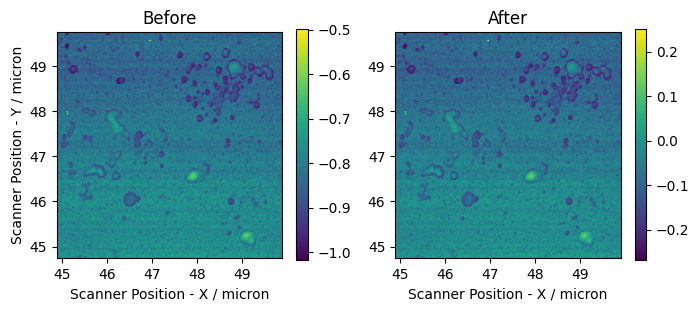

In [14]:
# Choose method
method = 'manual' # OR median, for automatic nromalization with the median of all pixel values
m_norm = neaim.SimpleNormalize(inputobj = m, mtype = method, value = -0.75)

# Plot before-after
px = 1/plt.rcParams['figure.dpi']
imheight = 300*px
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*imheight + 200*px, imheight))
# Before image
im1 = ax1.imshow(m.data,extent=[xmin, xmax, ymin, ymax])
ax1.set(xlabel='Scanner Position - X / micron',ylabel='Scanner Position - Y / micron')
ax1.set_title('Before')
fig.colorbar(im1,ax=ax1)
# After image
im2 = ax2.imshow(m_norm.data,extent=[xmin, xmax, ymin, ymax])
ax2.set(xlabel='Scanner Position - X / micron')
ax2.set_title('After')
fig.colorbar(im2,ax=ax2)
plt.show()